<a href="https://colab.research.google.com/github/tenzin67/Blogpage/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [10]:

# create module for nn.module
class model(nn.Module):
  # 4 features here
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x

In [11]:
# manual seeder for normalization
torch.manual_seed(42)
#create instant model
model = model()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [28]:
# training test split
X = df.drop('species', axis=1)
y = df['species']


In [29]:
x=X.values
y=y.values


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [39]:
# converting X feature to tensor float
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [40]:
# conveting Y features to tensor float
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [41]:
# How far the test are
criterion = nn.CrossEntropyLoss()
# chose adam optimiser
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [43]:
#train our model
#sendin traindata to all the network
epochs = 100
losses =[]
for i in range(epochs):
  #gor forward and predicts
  y_pred = model.forward(X_train) # get the result

  # measure the losess/error
  loss = criterion(y_pred, y_train)

  #keep the track of loss
  losses.append(loss.detach().numpy())

  #printe every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #finetune the weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.079680323600769
Epoch: 10 and loss: 0.914716899394989
Epoch: 20 and loss: 0.7535737752914429
Epoch: 30 and loss: 0.6014844179153442
Epoch: 40 and loss: 0.41731733083724976
Epoch: 50 and loss: 0.25342729687690735
Epoch: 60 and loss: 0.15017078816890717
Epoch: 70 and loss: 0.09916128218173981
Epoch: 80 and loss: 0.07776004821062088
Epoch: 90 and loss: 0.06818651407957077


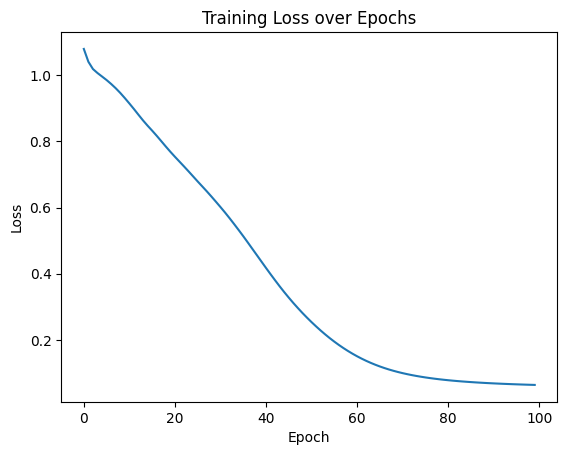

In [44]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training Loss over Epochs')
plt.show()